# HR Analytics


In [313]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import confusion_matrix,precision_score, roc_auc_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score
%matplotlib inline


In [314]:
pwd

'C:\\Users\\ajayt'

In [315]:
#Reading the file
df = pd.read_csv("C:/Users/ajayt/OneDrive/Desktop/Data_Programming_Project/general_data.csv")

In [316]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,Over18,OverTime,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,Y,Yes,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,Y,No,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,Y,Yes,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,Y,Yes,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,Y,No,12,8,2,9.0,2,6,0,4


In [317]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [318]:
#Getting the number of rows and columns
df.shape

(4410, 25)

In [319]:
df.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [320]:
df['Attrition'].value_counts()

No     3699
Yes     711
Name: Attrition, dtype: int64

## Data Cleaning

### 1. Finding null Values in columns

In [321]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
OverTime                    0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

<AxesSubplot:>

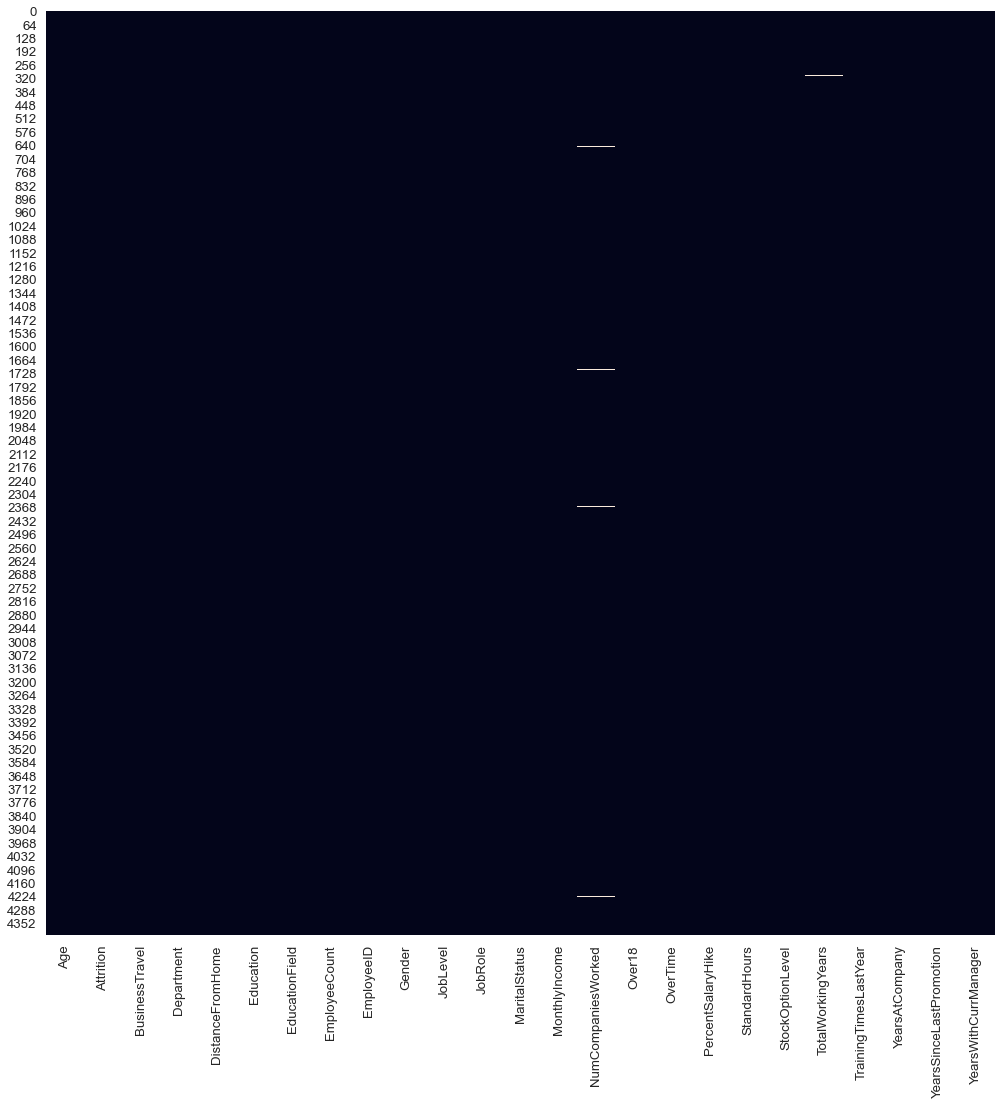

In [322]:
plt.subplots(figsize=(17,17))
sns.heatmap(df.isnull(),cbar=False)

#### There are few null values in the columns NumCompaniesWorked and TotalWorkingYears. We wil replace the null values with the median of the column as per the best practice

In [323]:
lst=df.columns[df.isna().any()].tolist()
for i in lst:
    df[i]=df[i].replace(np.nan,df[i].median())

#### Visualizing After the null values have been replaced with the median of the column

<AxesSubplot:>

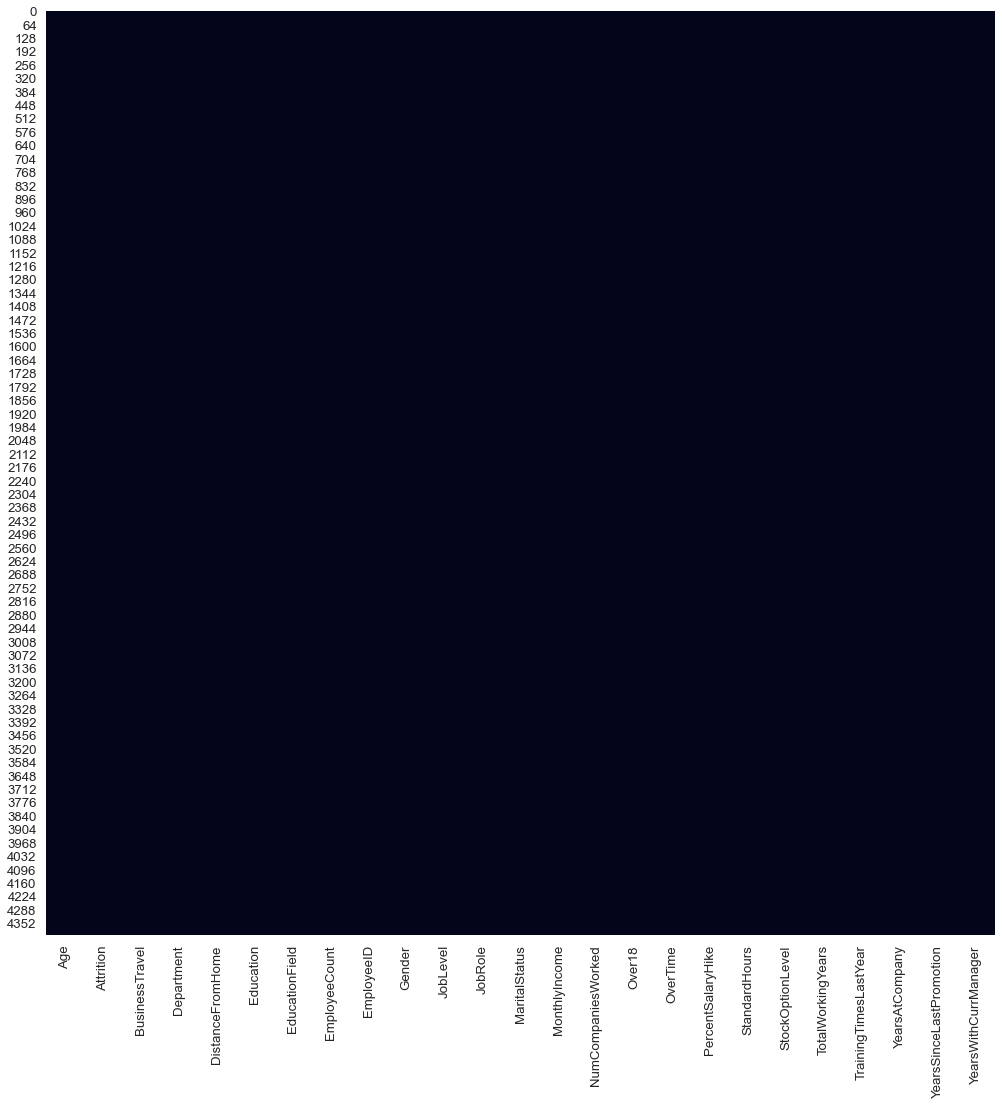

In [324]:
plt.subplots(figsize=(17,17))
sns.heatmap(df.isnull(),cbar=False)

### Dropping columns that are not adding more value

In [325]:
df.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis="columns", inplace=True)

# Data Visualizations

#### Creating a categorical column list for Visualizations


In [326]:
categorical_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 50:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")

Attrition : ['No' 'Yes']
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department : ['Sales' 'Research & Development' 'Human Resources']
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender : ['Female' 'Male']
JobRole : ['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Research Director' 'Laboratory Technician'
 'Manufacturing Director' 'Sales Representative' 'Manager']
MaritalStatus : ['Married' 'Single' 'Divorced']
OverTime : ['Yes' 'No']


In [327]:
df['Attrition'] = df.Attrition.astype("category").cat.codes


### Data Visualizations

In [328]:
df.Attrition.value_counts()

0    3699
1     711
Name: Attrition, dtype: int64

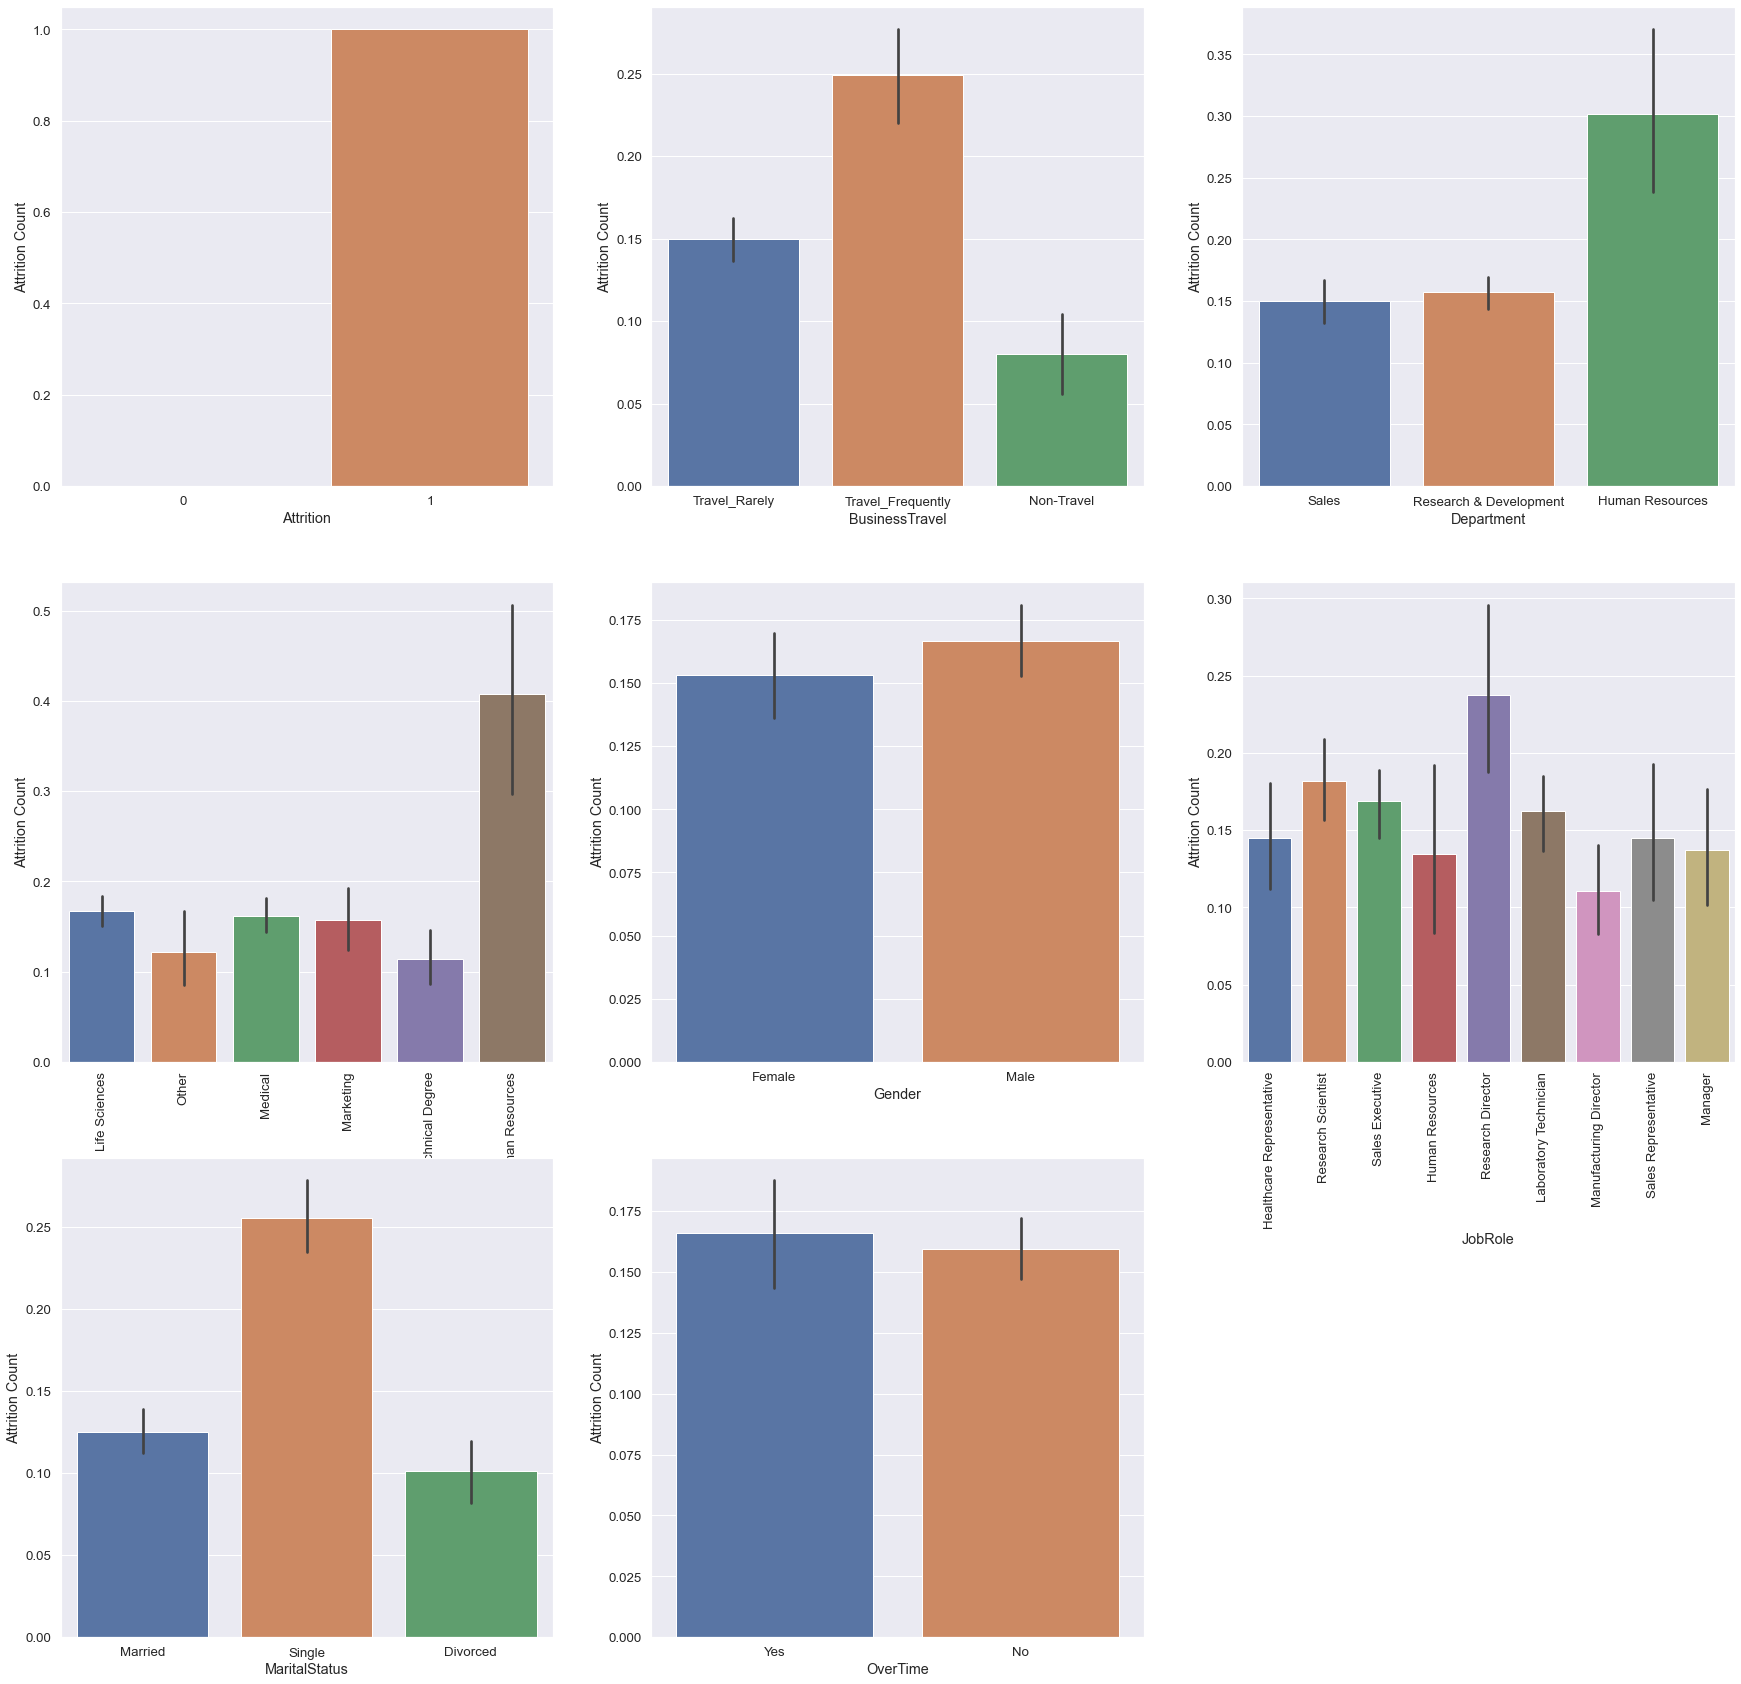

In [329]:
# Plotting how every feature correlate with the "target"
sns.set(font_scale=1.2)
plt.figure(figsize=(30, 30))

for i, column in enumerate(categorical_col, 1):
    plt.subplot(3, 3, i)
    g = sns.barplot(x=f"{column}", y='Attrition', data=df)
    if column == 'JobRole' or column == 'EducationField':
        rot = 90
    else :
        rot = 0
    g.set_xticklabels(g.get_xticklabels(), rotation = rot)
    plt.ylabel('Attrition Count')
    plt.xlabel(f'{column}')

1] BusinessTravel : The workers who travel alot are more likely to quit then other employees.

2] Department : The worker in Research & Development are more likely to stay then the workers on other departement.

3] EducationField : The workers with Human Resources and Technical Degree are more likely to quit then employees from other fields of educations.

4] Gender : The Male are more likely to quit.

5] JobRole : The workers in Laboratory Technician, Sales Representative, and Human Resources are more likely to quit the workers in other positions.

6] MaritalStatus : The workers who have Single marital status are more likely to quit the Married, and Divorced.

7] OverTime : The workers who work more hours are likely to quit then others.

<AxesSubplot:>

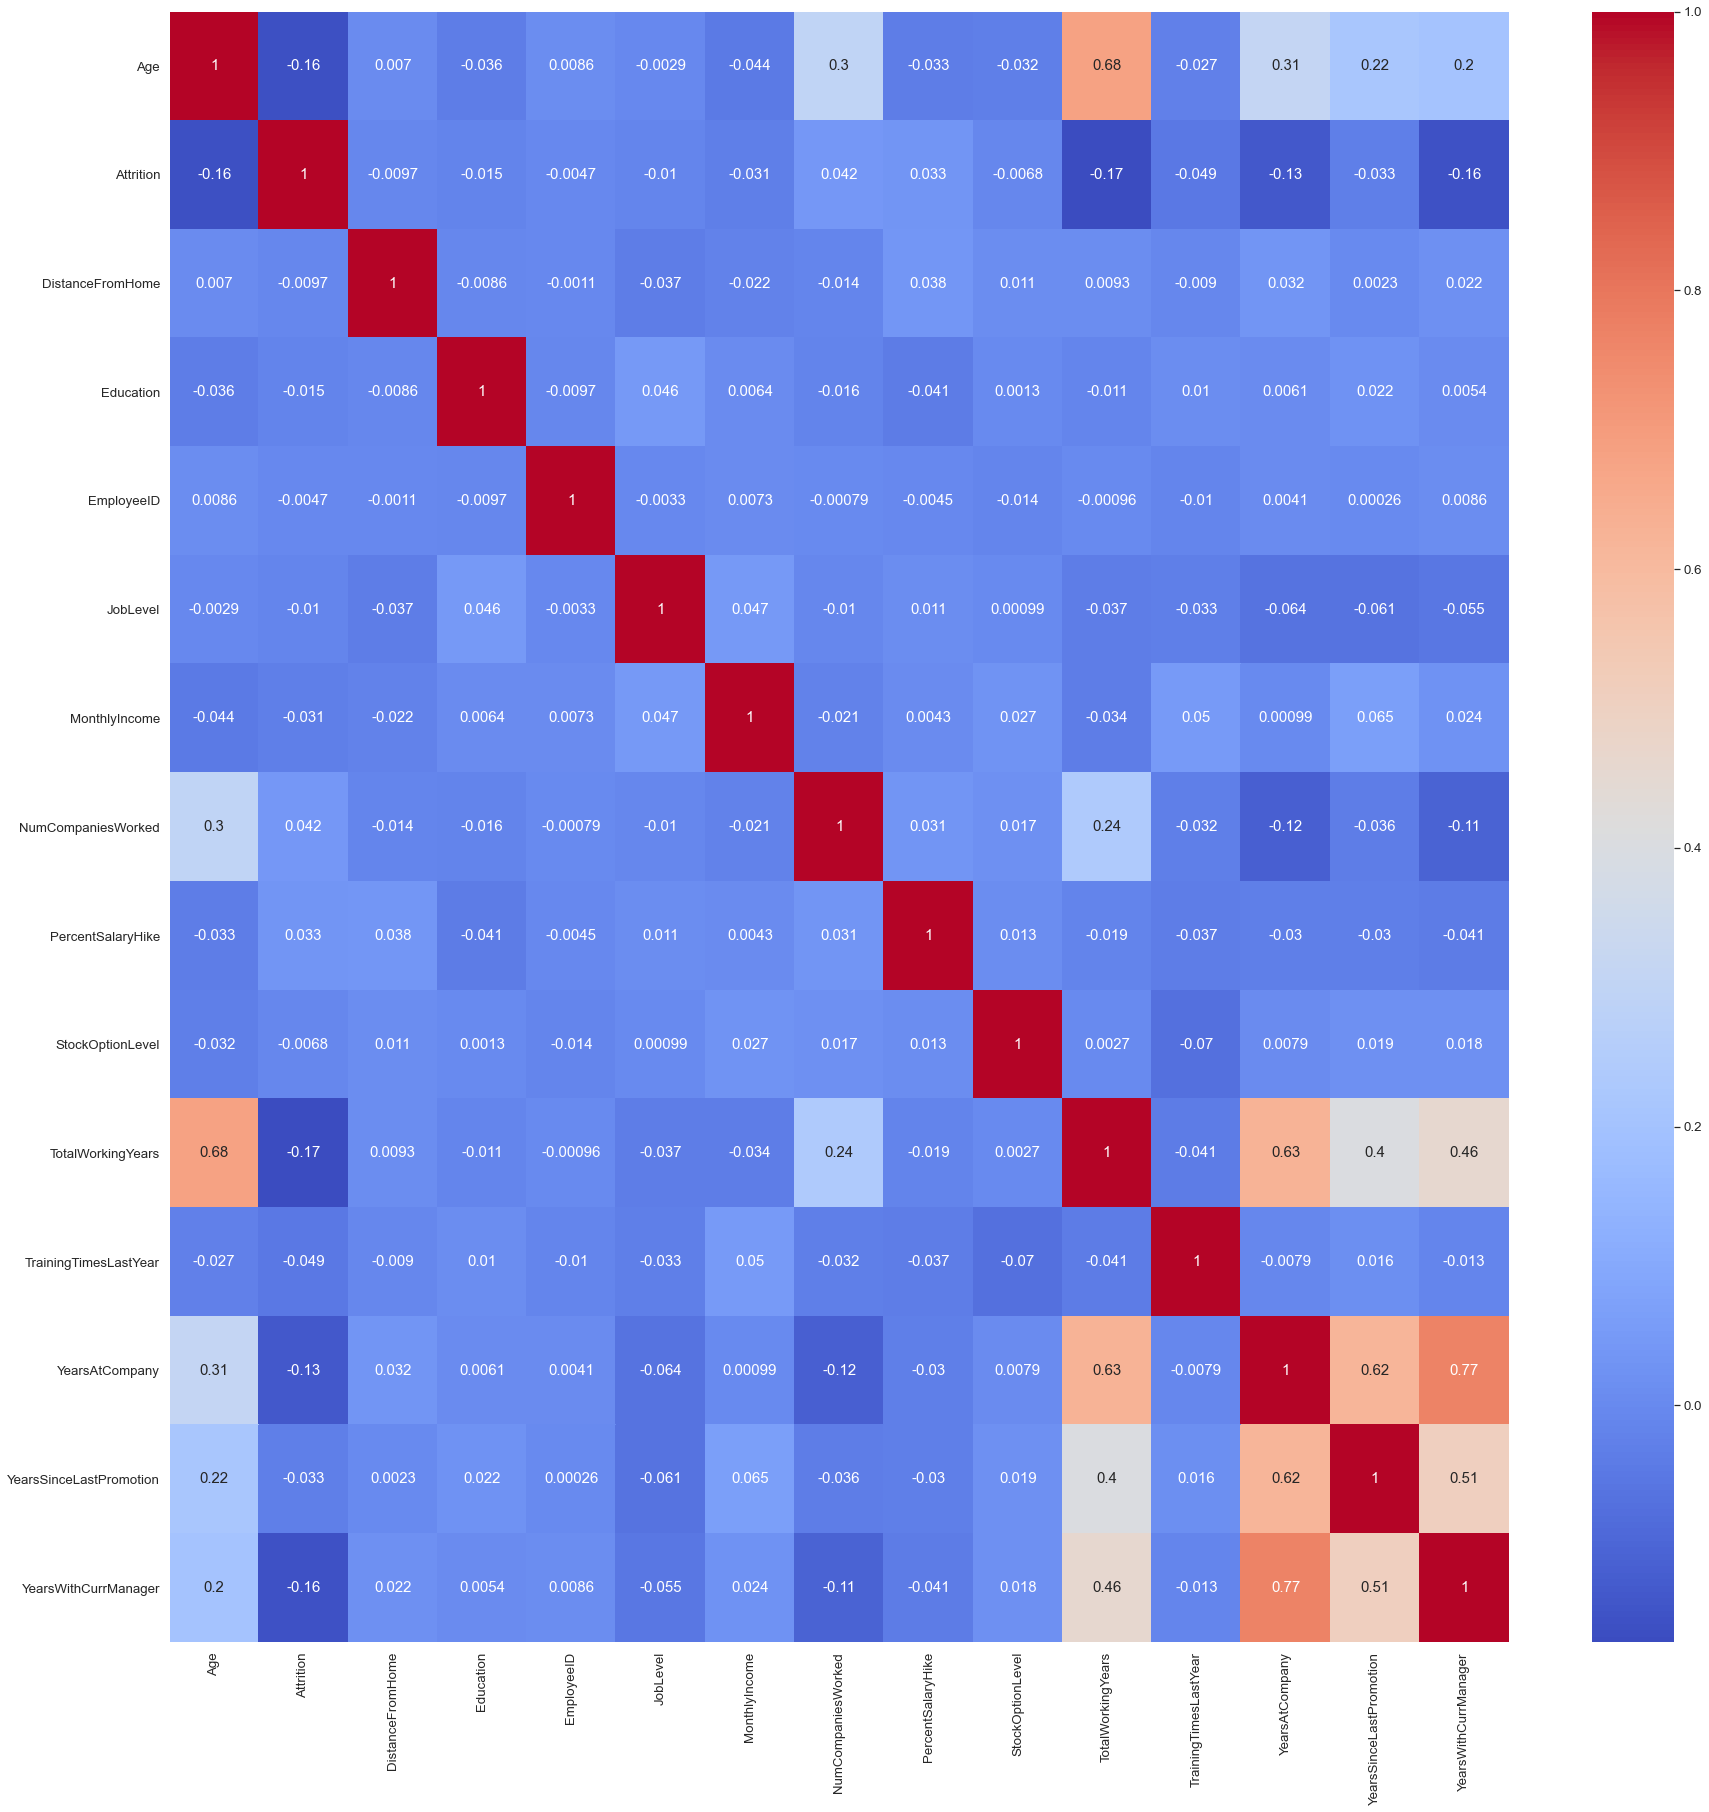

In [330]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", annot_kws={"size":15})

#### Machine Learning¶
##### The end goal is to determine if an employee will leave the company or not. Therefore, this is a classification case. We'll use multiple techniques and eventually select the method with the best score. The methods used will be:

##### 1)Logistic Regression

##### 2)Decision Tree Classification

##### 3)Random Forest Classification

##### Following code converts columns from string values to integer values for purpose of fitting data in machine learning

In [331]:
from sklearn.preprocessing import LabelEncoder
label_encoder_y=LabelEncoder()

'''Identifying the columns with string'''
df_num = df.select_dtypes(exclude=[np.number])
lst=list(df_num.columns)

'''Converting those columns to integer values'''
for i in lst:
    df[i]=label_encoder_y.fit_transform(df[i])
df.head(10)



,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,...,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,1,1,0,1,...,131160,1.0,1,11,0,1.0,6,1,0,0
1,31,1,1,1,10,1,1,2,0,1,...,41890,0.0,0,23,1,6.0,3,5,1,4
2,32,0,1,1,17,4,4,3,1,4,...,193280,1.0,1,15,3,5.0,2,5,0,3
3,38,0,0,1,2,5,1,4,1,3,...,83210,3.0,1,11,3,13.0,5,8,7,5
4,32,0,2,1,10,1,3,5,1,1,...,23420,4.0,0,12,2,9.0,2,6,0,4
5,46,0,2,1,8,3,1,6,0,4,...,40710,3.0,0,13,0,28.0,5,7,7,7
6,28,1,2,1,11,2,3,7,1,2,...,58130,2.0,1,20,1,5.0,2,0,0,0
7,29,0,2,1,18,3,1,8,1,2,...,31430,2.0,0,22,3,10.0,2,0,0,0
8,31,0,2,1,1,3,1,9,1,3,...,20440,0.0,0,21,0,10.0,2,9,7,8
9,25,0,0,1,7,4,3,10,0,4,...,134640,1.0,0,13,1,6.0,2,6,1,5


In [332]:

y = df['Attrition']
X= df.drop('Attrition', axis = 1)

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state=44)

In [333]:
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
X_train = Scaler_X.fit_transform(X_train)
X_test = Scaler_X.transform(X_test)

In [334]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear', random_state = 44)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

print("The accuracy score is: ", format(accuracy_score(y_test,y_pred)))
print(" ")
print("Confusion matrix: ","\n",confusion_matrix(y_test,y_pred))
cnf_matrix = confusion_matrix(y_test,y_pred)


The accuracy score is:  0.8492063492063492
 
Confusion matrix:  
 [[1483   10]
 [ 256   15]]


Text(0.5, 257.44, 'Predicted label')

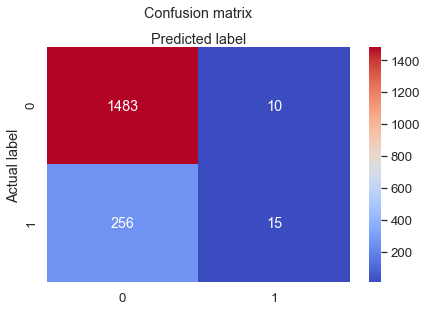

In [335]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [336]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      1493
           1       0.60      0.06      0.10       271

    accuracy                           0.85      1764
   macro avg       0.73      0.52      0.51      1764
weighted avg       0.81      0.85      0.79      1764



##### The model predicts 25 cases of attrition, out of which 15 employees actually have left the company. There are 10 false positives, what gives us precision score = 0.60.

##### Our model didn't catch 256 of employees who actually left the company, and the recall score = 0.06.



## Decision Tree Classifier

In [339]:
dec_tree_model = tree.DecisionTreeClassifier(random_state=0, max_depth=3,criterion='gini')
dec_tree_model.fit(X_train, y_train)
y_predict_dt = dec_tree_model.predict(X_test)
dec_tree_model_score = format(dec_tree_model.score(X_test, y_test))
print("The accuracy score using Decision Tree Classifier is: ",dec_tree_model_score)
print(" ")
print("Confusion matrix: ","\n",confusion_matrix(y_test,y_predict_dt))

The accuracy score using Decision Tree Classifier is:  0.8514739229024944
 
Confusion matrix:  
 [[1456   37]
 [ 225   46]]


In [340]:
print(classification_report(y_test,y_predict_dt))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1493
           1       0.55      0.17      0.26       271

    accuracy                           0.85      1764
   macro avg       0.71      0.57      0.59      1764
weighted avg       0.82      0.85      0.82      1764



## Random Forest Classifier

In [337]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators=50,max_depth=4,random_state=0)
RF_model.fit(X_train, y_train)
y_predict_rf = RF_model.predict(X_test)
RF_model_score = (format(RF_model.score(X_test, y_test)))
print("The accuracy score using Random Forest Classifier is: ",RF_model_score)
print(" ")
print("Confusion matrix: ","\n",confusion_matrix(y_test,y_predict_rf))

The accuracy score using Random Forest Classifier is:  0.8571428571428571
 
Confusion matrix:  
 [[1486    7]
 [ 245   26]]


In [338]:
print(classification_report(y_test,y_predict_rf))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1493
           1       0.79      0.10      0.17       271

    accuracy                           0.86      1764
   macro avg       0.82      0.55      0.55      1764
weighted avg       0.85      0.86      0.81      1764

